# Importing Required Libraries & Datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [4]:
sns.set(rc={'figure.figsize':(15,10)})

In [5]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [6]:
raw_data.head(7)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
312505,312443,500,500.0,450.0,36 months,9.76%,16.08,B,B2,"Hughes, Hubbard & Reed LLP",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
242695,242682,500,500.0,500.0,36 months,10.71%,16.31,B,B5,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
216698,174214,500,500.0,500.0,36 months,10.46%,16.25,B,B5,THe University of Illinois,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
211133,210644,500,500.0,475.0,36 months,11.41%,16.47,C,C3,Global Travel International -and- Global Domai...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
164346,163835,500,500.0,400.0,36 months,8.07%,15.69,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306018,305720,700,700.0,700.0,36 months,12.29%,23.35,C,C5,SDSU Residential Life,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
311591,311571,725,725.0,650.0,36 months,7.37%,22.51,A,A1,"Team Awesome Productions, Inc.",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1. Cleaning Data

### This step involves cleaning data and converting them into respective formats which can be easily considered for quick calculations

### 1.0 Formatting Funded Amount Column Into Funding Category

In [7]:
raw_data['funded_amount_category'] = raw_data['funded_amnt'].apply(lambda x: math.ceil(x/1000.00) * 1000)

### 1.1 Formatting Loan Term Column

In [8]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [9]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

### 1.2 Formatting Interest Column to Float Value

In [10]:
def extract_valid_float_from_interest_column(row):
    row = re.sub('[%, ]', '', str(row))
    return float(row)

In [11]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_interest_column)

### 1.3 Creating Categorical Column For Interest

In [12]:
raw_data['int_rate_category'] = raw_data['int_rate'].apply(lambda x: math.ceil(x))

### 1.3 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column. (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)

In [13]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with dropping the alphabet from Sub-Grade column

In [14]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [15]:
raw_data['sub_grade'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

### 1.4 Formatting Employee Length (Years of Experience) Column

In [16]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [17]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

### 1.5 Formatting Ownership Column (Creating new mapped column)

In [18]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [19]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}

In [20]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

### 1.6 Formatting Annual Income / Salary Column (Creating new mapped column)

In [21]:
raw_data['annual_inc_category'] = raw_data['annual_inc'].apply(lambda x: math.ceil(x/50000.00) * 50000)

### 1.6 Formatting Salary Verification Column (Creating new mapped column)

In [22]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [23]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [24]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

### 1.7 Formatting Loan Issue Date to datetime object

In [25]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

### 1.8 Formatting Loan Status Column (Creating new mapped column)

In [26]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [27]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

In [28]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

### 1.9 Payment Plan Column can be dropped off, as all the records in this column contains same value

In [29]:
if 'pymnt_plan' in raw_data.columns:
    raw_data = raw_data.drop(columns=['pymnt_plan'])

### 1.10 Formatting Purpose Column

In [30]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

### 1.11 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [31]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [32]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

### 1.12 Formatting Earliest Credit Line Column to Valid Date object

In [33]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [34]:
raw_data.earliest_cr_line.describe()

<ipython-input-34-ddce41ebc1d2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.earliest_cr_line.describe()


count                   39717
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

### 1.13 Formatting Months Since Last Delinq(Default) & Months Since Last Record Column to Valid format

In [35]:
def clean_months_since_last_column(row):
    if type(row) == str:
        return np.nan
    else:
        return float(row)

In [36]:
raw_data['mths_since_last_delinq'] = raw_data.mths_since_last_delinq.apply(clean_months_since_last_column)

In [37]:
raw_data['mths_since_last_record'] = raw_data.mths_since_last_record.apply(clean_months_since_last_column)

### 1.14 Formatting Months Since Last Delinq(Default) & Months Since Last Record Column to Valid format

In [38]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_interest_column)

### 1.15 Initial Status Column can be dropped off, as all the records in this column contains same value.

In [39]:
if 'initial_list_status' in raw_data.columns:
    raw_data = raw_data.drop(columns=['initial_list_status'])

In [40]:
raw_data.out_prncp_inv.dtypes

dtype('float64')

### 1.16 Formatting Last Payment, Next Payment & Last Credit Pull Date Column to Valid format

In [41]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [42]:
raw_data['next_pymnt_d'] = pd.to_datetime(raw_data.next_pymnt_d, format='%b-%y')

In [43]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

### 1.17 Application Type Column can be dropped off, as all the records in this column contains same value.

In [44]:
if 'application_type' in raw_data.columns:
    raw_data = raw_data.drop(columns=['application_type'])

### 1.18 All the columns after Application Type Column are in the correct format (i.e. float value). Hence, those columns need not have to be cleaned

# ==> 2. Comparing Data Between Charged Off & Fully Paid Customers <==

loan_status,Charged Off,Current,Fully Paid
funded_amount_category,,,
1000,15.286624,0.955414,83.757962
2000,14.000000,0.642857,85.357143
3000,14.128440,0.917431,84.954128
4000,13.413586,1.031814,85.554600
5000,13.611192,1.165841,85.222967
6000,11.555556,1.299145,87.145299
7000,11.979167,1.325758,86.695076
8000,13.409169,1.309893,85.280938
9000,13.171691,1.310616,85.517693


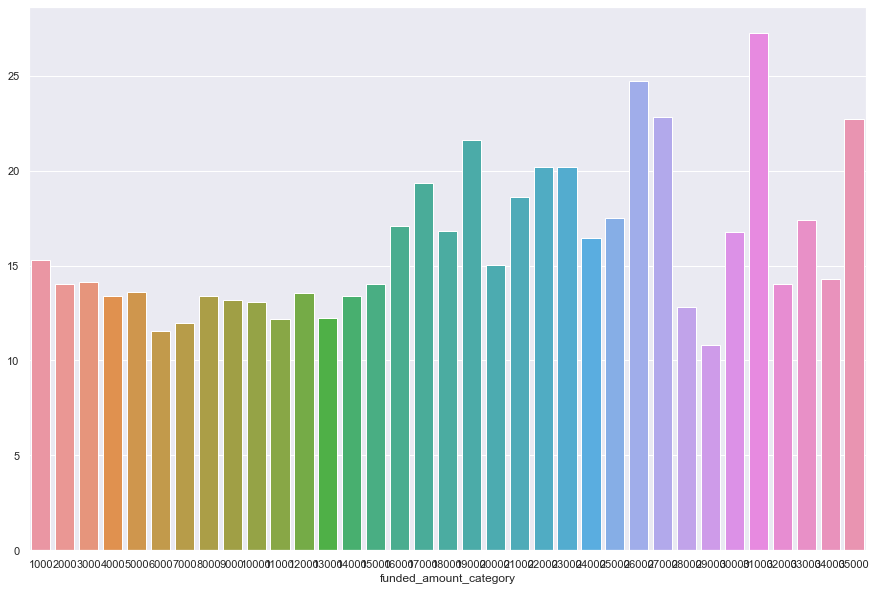

In [45]:
plot_this = raw_data.pivot_table(index='funded_amount_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y = plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
term,,,
36,11.090872,0.000000,88.909128
60,22.596742,10.733453,66.669805


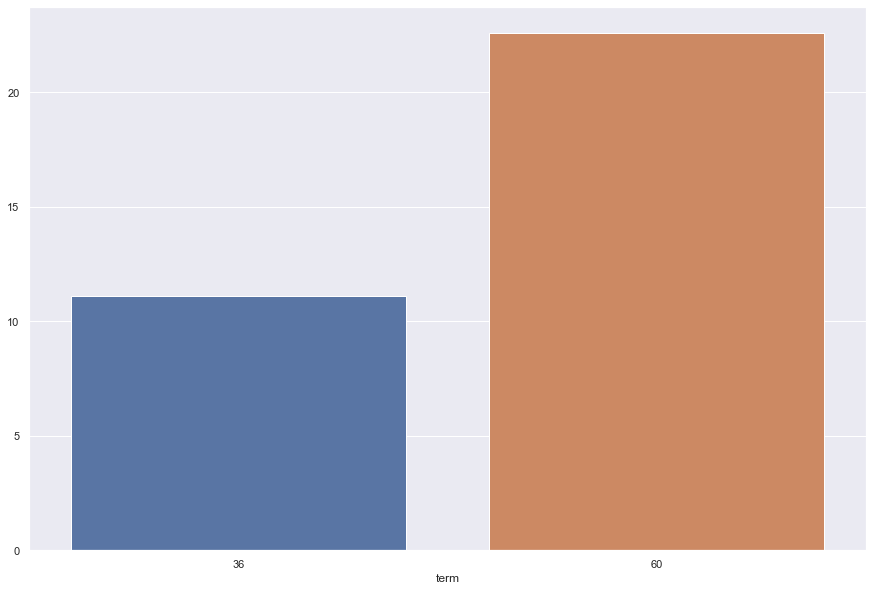

In [46]:
plot_this = raw_data.pivot_table(index='term', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
int_rate_category,,,
6,4.080119,0.148368,95.771513
7,4.819765,0.000000,95.180235
8,6.023551,0.294384,93.682065
9,8.967223,1.669759,89.363018
10,9.634290,1.376327,88.989383
11,11.054298,2.410519,86.535184
12,13.694339,2.953681,83.351980
13,15.204170,3.359398,81.436432
14,15.911355,2.340637,81.748008


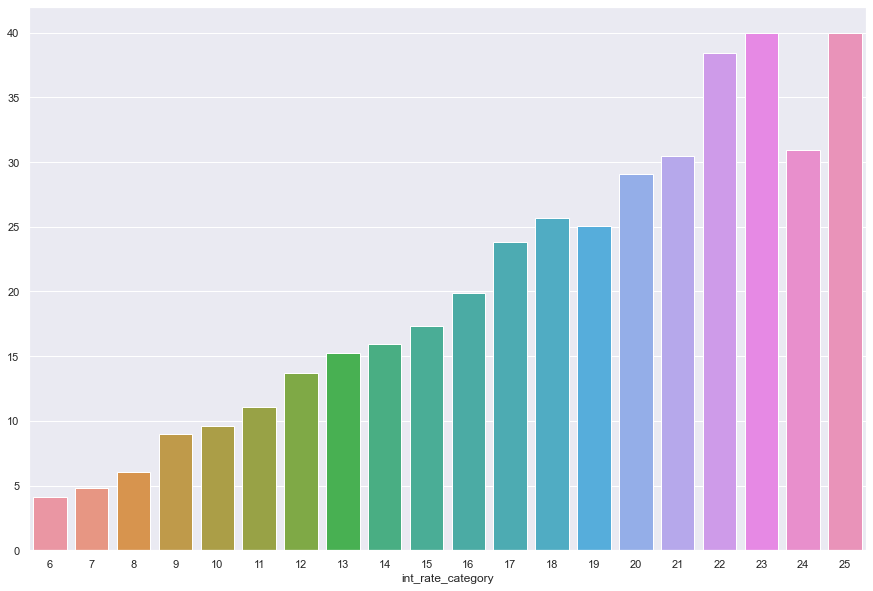

In [47]:
plot_this = raw_data.pivot_table(index='int_rate_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,5.969261,0.396629,93.634110
B,11.855241,2.870216,85.274542
C,16.633737,3.260064,80.106199
D,21.066516,4.183154,74.750330
E,25.158339,6.298381,68.543279
F,30.409914,6.959009,62.631077
G,31.962025,5.379747,62.658228


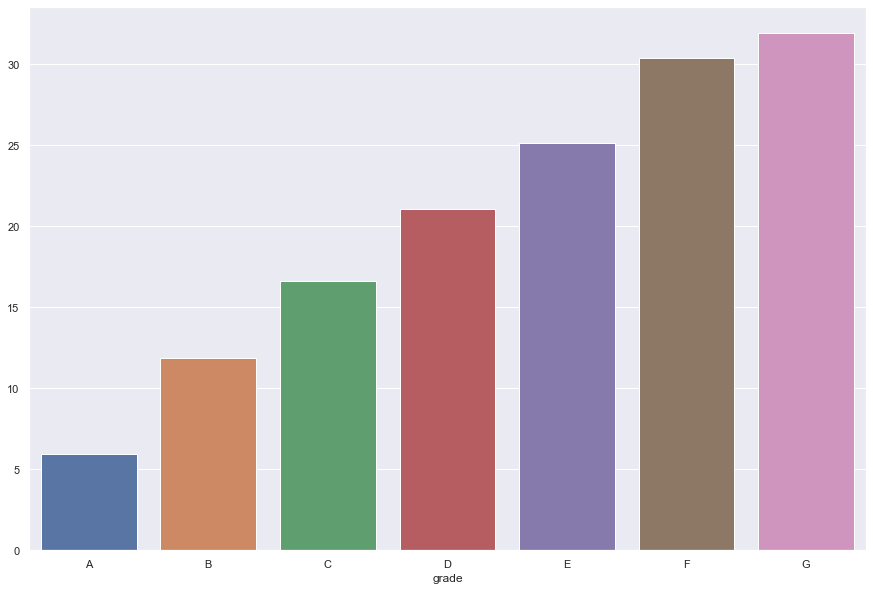

In [48]:
plot_this = raw_data.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
sub_grade,,,
A1,2.633889,0.000000,97.366111
A2,4.907162,0.000000,95.092838
A3,5.690608,0.000000,94.309392
A4,6.167706,0.450450,93.381843
A5,7.913931,0.984683,91.101386
B1,9.344262,1.803279,88.852459
B2,11.084103,2.722411,86.193486
B3,11.690093,3.153925,85.155982
B4,13.097134,2.985669,83.917197


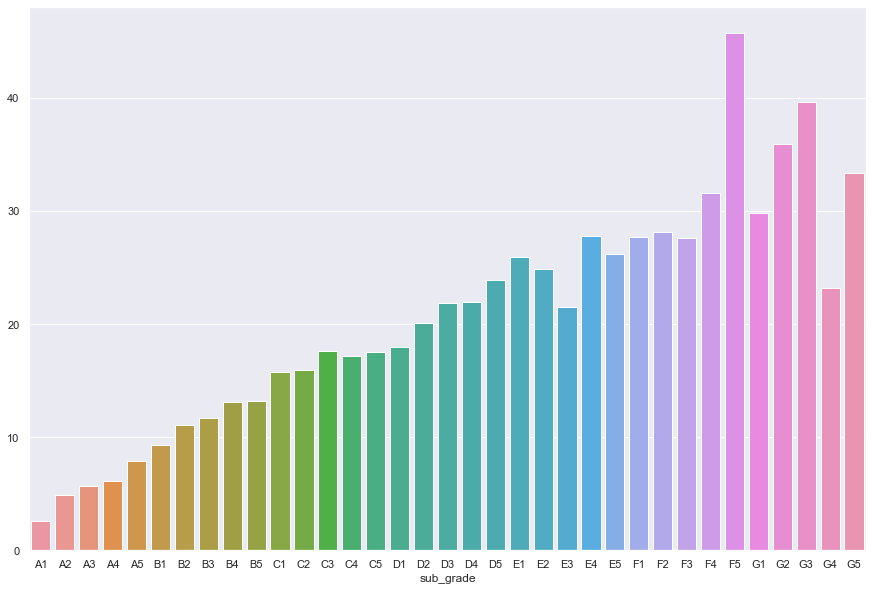

In [49]:
temp_data = pd.read_csv('loan.csv', index_col='id')
plot_this = temp_data.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
NONE,0.000000,0.000000,100.000000
MORTGAGE,13.177417,3.612889,83.209695
OWN,14.486593,2.714192,82.799215
RENT,15.021959,2.217049,82.760993
OTHER,18.367347,0.000000,81.632653


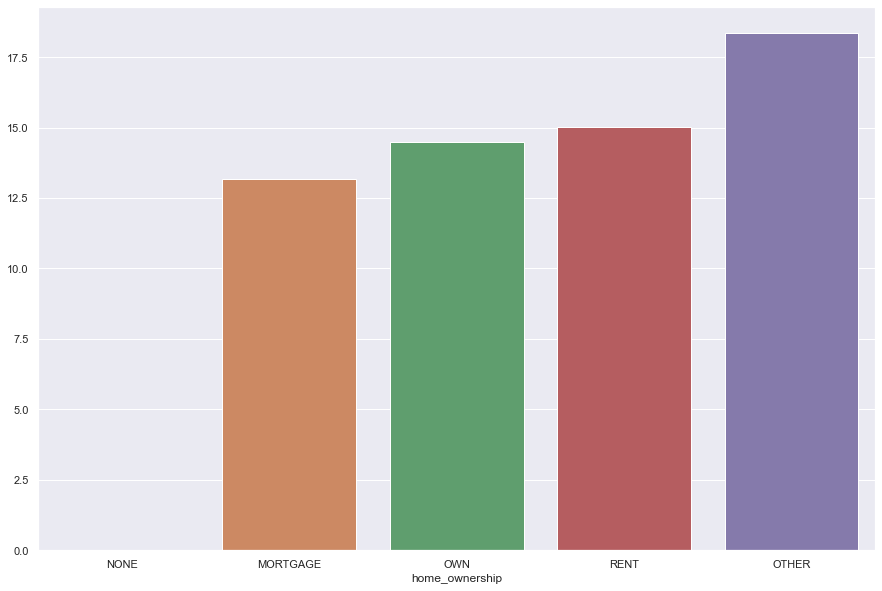

In [50]:
plot_this = raw_data.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
annual_inc_category,,,
50000,16.596799,2.254827,81.148374
100000,13.245106,3.166357,83.588538
150000,10.372340,3.409091,86.218569
200000,10.673575,5.077720,84.248705
250000,10.211268,2.464789,87.323944
300000,7.874016,3.937008,88.188976
350000,9.803922,0.000000,90.196078
400000,12.500000,6.250000,81.250000
450000,0.000000,0.000000,100.000000


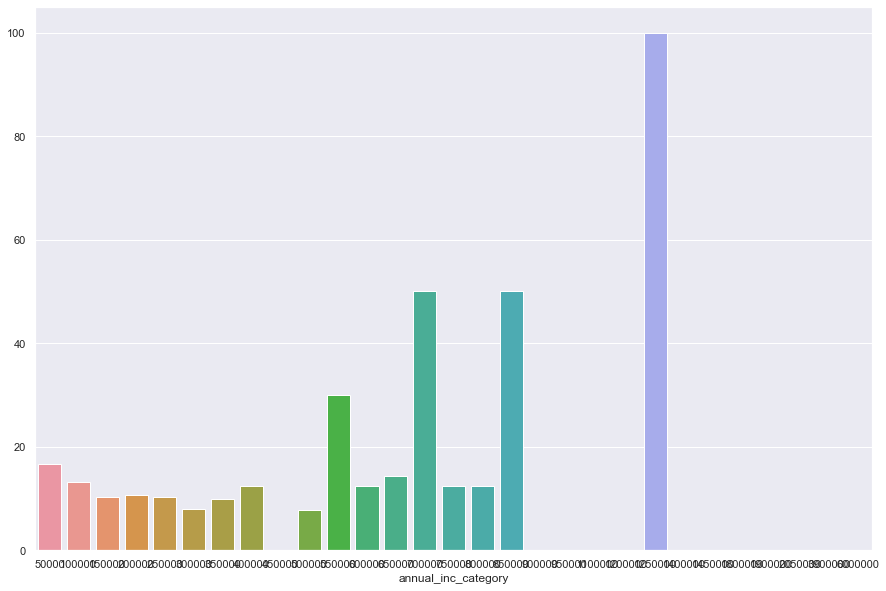

In [51]:
plot_this = raw_data.pivot_table(index='annual_inc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,12.658826,1.341528,85.999645
Source Verified,14.358666,3.104035,82.537298
Verified,16.012179,4.707627,79.280194


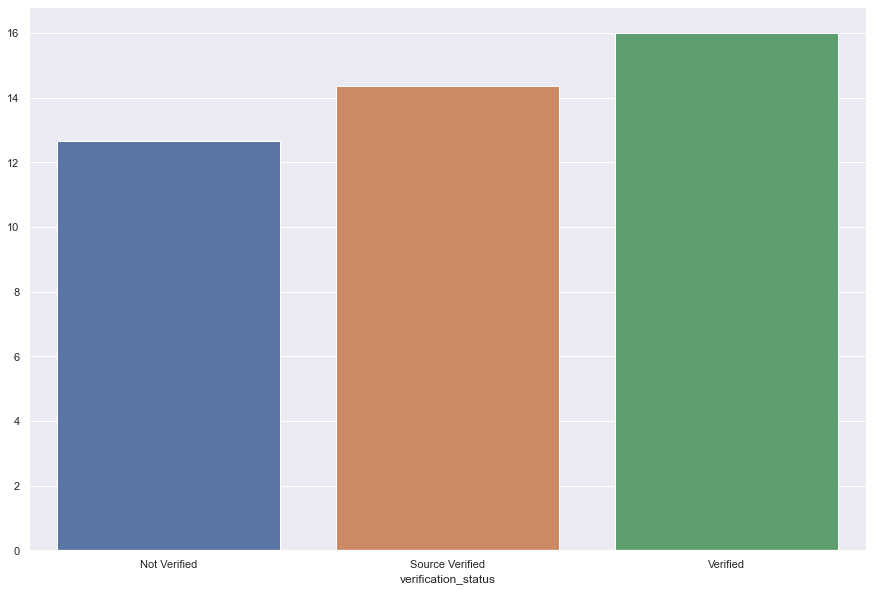

In [52]:
plot_this = raw_data.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
issue_d_year,,,
2007,17.928287,0.00000,82.071713
2008,15.813060,0.00000,84.186940
2009,12.595420,0.00000,87.404580
2010,12.877211,0.00000,87.122789
2011,15.035094,5.26413,79.700776


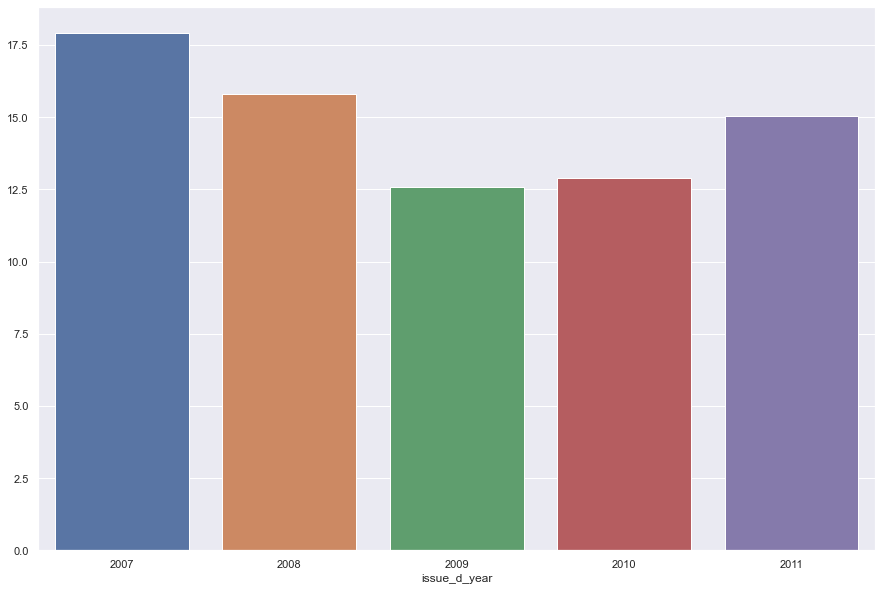

In [53]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year
plot_this = raw_data.pivot_table(index='issue_d_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
issue_d_month,,,
1,13.493064,0.000000,86.506936
2,12.298558,0.000000,87.701442
3,12.890045,0.037147,87.072808
4,13.055752,0.105857,86.838391
5,15.538513,2.667556,81.793931
6,14.730101,3.019213,82.250686
7,13.780207,3.596087,82.623705
8,13.303013,3.695281,83.001706
9,14.994518,4.111842,80.893640


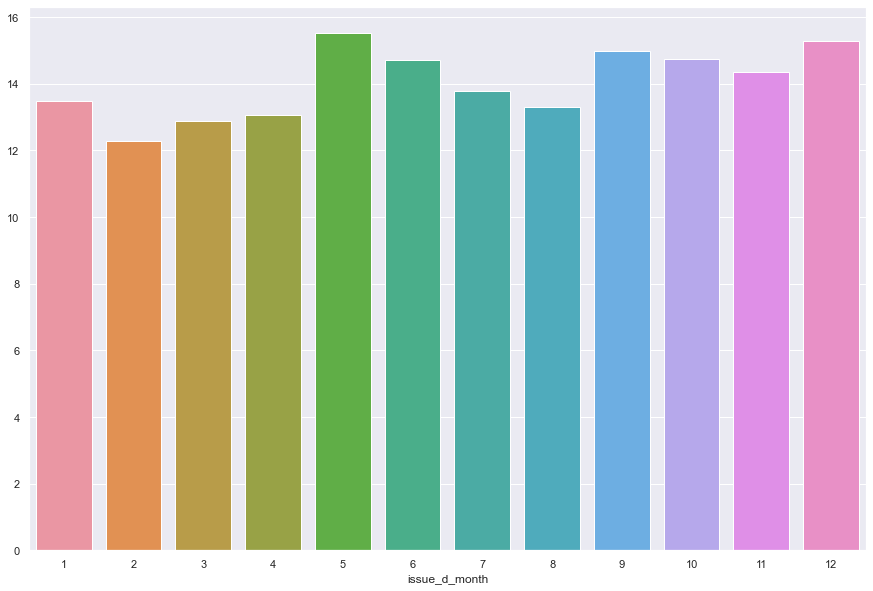

In [54]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month
plot_this = raw_data.pivot_table(index='issue_d_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
plot_this

loan_status,Charged Off,Current,Fully Paid
purpose,,,
Wedding,10.137276,2.217529,87.645195
Major Purchase,10.150892,1.691815,88.157293
Car,10.329245,3.227889,86.442866
Credit Card,10.565302,2.007797,87.426901
Home Improvement,11.659946,3.393817,84.946237
Vacation,13.910761,1.574803,84.514436
Debt Consolidation,14.843624,3.143608,82.012768
Medical,15.295815,1.731602,82.972583
House,15.485564,3.674541,80.839895


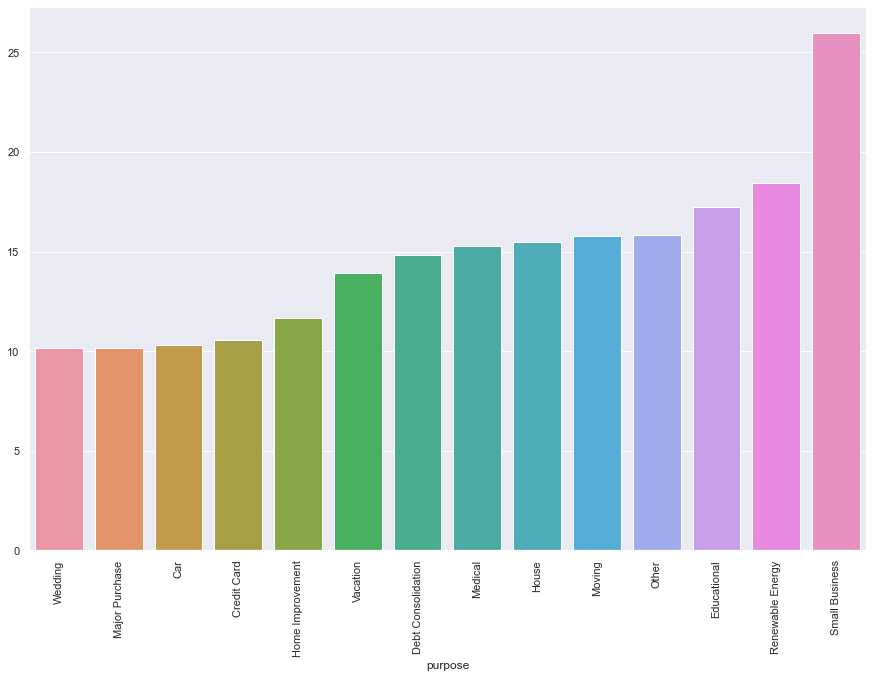

In [55]:
plot_this = raw_data.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plot_this

loan_status,Charged Off,Current,Fully Paid
addr_state_name,,,
Maine,0.000000,0.000000,100.000000
Iowa,0.000000,0.000000,100.000000
Indiana,0.000000,0.000000,100.000000
Wyoming,4.819277,3.614458,91.566265
Delaware,10.526316,0.877193,88.596491
Mississippi,10.526316,0.000000,89.473684
Arkansas,11.020408,4.081633,84.897959
Vermont,11.111111,1.851852,87.037037
Kansas,11.439114,5.904059,82.656827


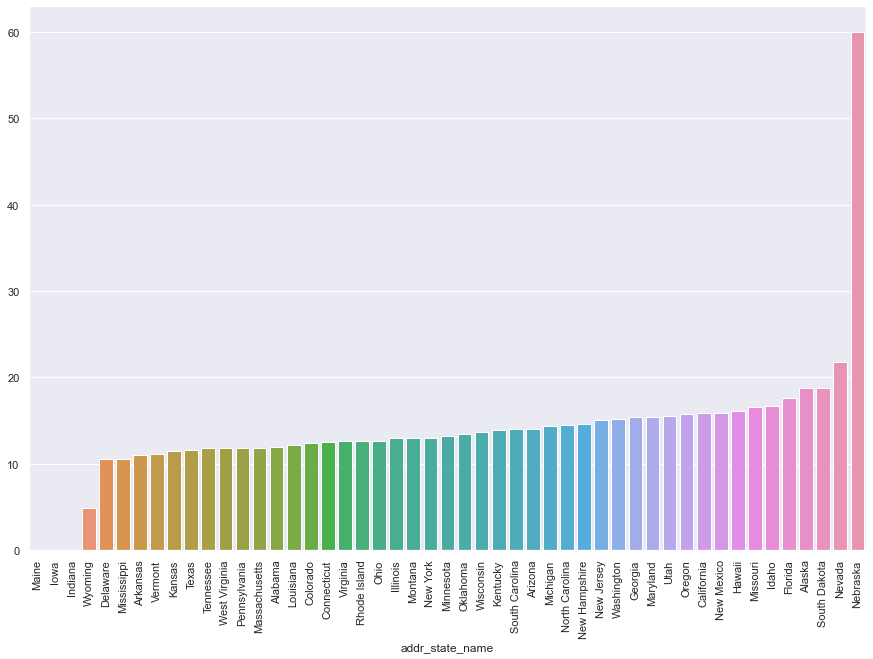

In [56]:
plot_this = raw_data.pivot_table(index='addr_state_name', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plot_this